Блок кода для визуализации процесса обучения модели:


In [ ]:
from IPython.display import clear_output
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

class ProgressPlotter:
  def __init__(self,title = None) -> None:
    self._history_dict = defaultdict(list)
    self.title = title

  def add_scalar(self, tag: str, value)-> None:
    self._history_dict[tag].append(value)

  def display_keys(self,ax,tags):
    if isinstance(tags, str):
      tags = [tags]
    history_len = 0
    ax.grid()
    for key in tags:
      ax.plot(self._history_dict[key], marker="X",label=key)
      history_len = max(history_len,len(self.history_dict[key]))
    if len(tags) > 1:
      ax.legend(loc="lower left")
    else:
      ax.set_ylabel(key)
    ax.set_xlabel('step')
    ax.set_xticks(np.arange(history_len))
    ax.set_xticklabels(np.arange(history_len))

  """
     groups list of keys like [['loss_train','loss_val'],['accuracy']]
     All charts within a group will be plot in the same axis
  """
  def display(self,groups = None):
    clear_output()
    if groups is None:
      groups = self._history_dict.keys()
    n_groups = len(groups)
    fig, ax = plt.subplots(n_groups, 1, figsize=(12, 3*n_groups))
    fig.suptitle(self.title)
    if n_groups == 1:
      ax = [ax]
    for i, keys in enumerate(groups):
      self.display_keys(ax[i],keys)
    fig.tight_layout()
    plt.show()

  @property
  def history_dict(self):
    return dict(self._history_dict)

In [ ]:
import random
import torch

def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_random_seed(42)

# Задание 1. Функция свертки

Реализуйте функцию свёртки `conv(x, kernel, pad)`, где:


* $\text{x}$: Двумерный массив размером $(H, W)$;
* $\text{kernel}$: ядро свёртки размером $(K_h, K_w)$;

* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} \geq 0$.

Шаг ядра свёртки полагается равным единице

Результатом работы функции будет массив $out$ содержащий результат свертки входных данных с $kernel$ имеющий размер $(H', W')$:
  - $H' = 1 + (H + 2 \cdot pad - K_h)\ $.
  - $W' = 1 + (W + 2 \cdot pad - K_w)\ $;


In [ ]:
def conv(x, kernel, pad):
    h, w = np.array(x.shape)
    x = torch.tensor(np.pad(x, pad_width=[(pad, pad),(pad,pad)]))
    kh, kw = np.array(kernel.shape)  # kernel height and width
    out = np.zeros((h + 2*pad - kh + 1, w + 2*pad - kw + 1))
    for i in range(h - kh + 1 + 2*pad):
        for j in range(w - kw + 1 + 2*pad):
            patch = x[i : i + kh, j : j + kw]
            new_pixel = torch.sum(patch*kernel)
            out[i, j] = new_pixel
    return out


Тест

In [ ]:
M = np.array([[0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0]])

kernel = np.array([[1, 0, -1]])
actual = conv(M, kernel, pad=1)

print(actual.shape, "\n", actual)


expected = np.array([[0,  0,  0,  0,  0],
                     [0, -1,  0,  1,  0],
                     [0, -1,  0,  1,  0],
                     [0, -1,  0,  1,  0],
                     [0, -1,  0,  1,  0],
                     [0, -1,  0,  1,  0],
                     [0,  0,  0,  0,  0]])


assert np.array_equal(expected, actual), "Error"

(7, 5) 
 [[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]]


Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) к изображению.  

Выведите на экран:
* изначальное изображение
* приближённые производные по вертикали
* приближённые производные по горизонтали
* норму градиента (корень от суммы квадратов производных).

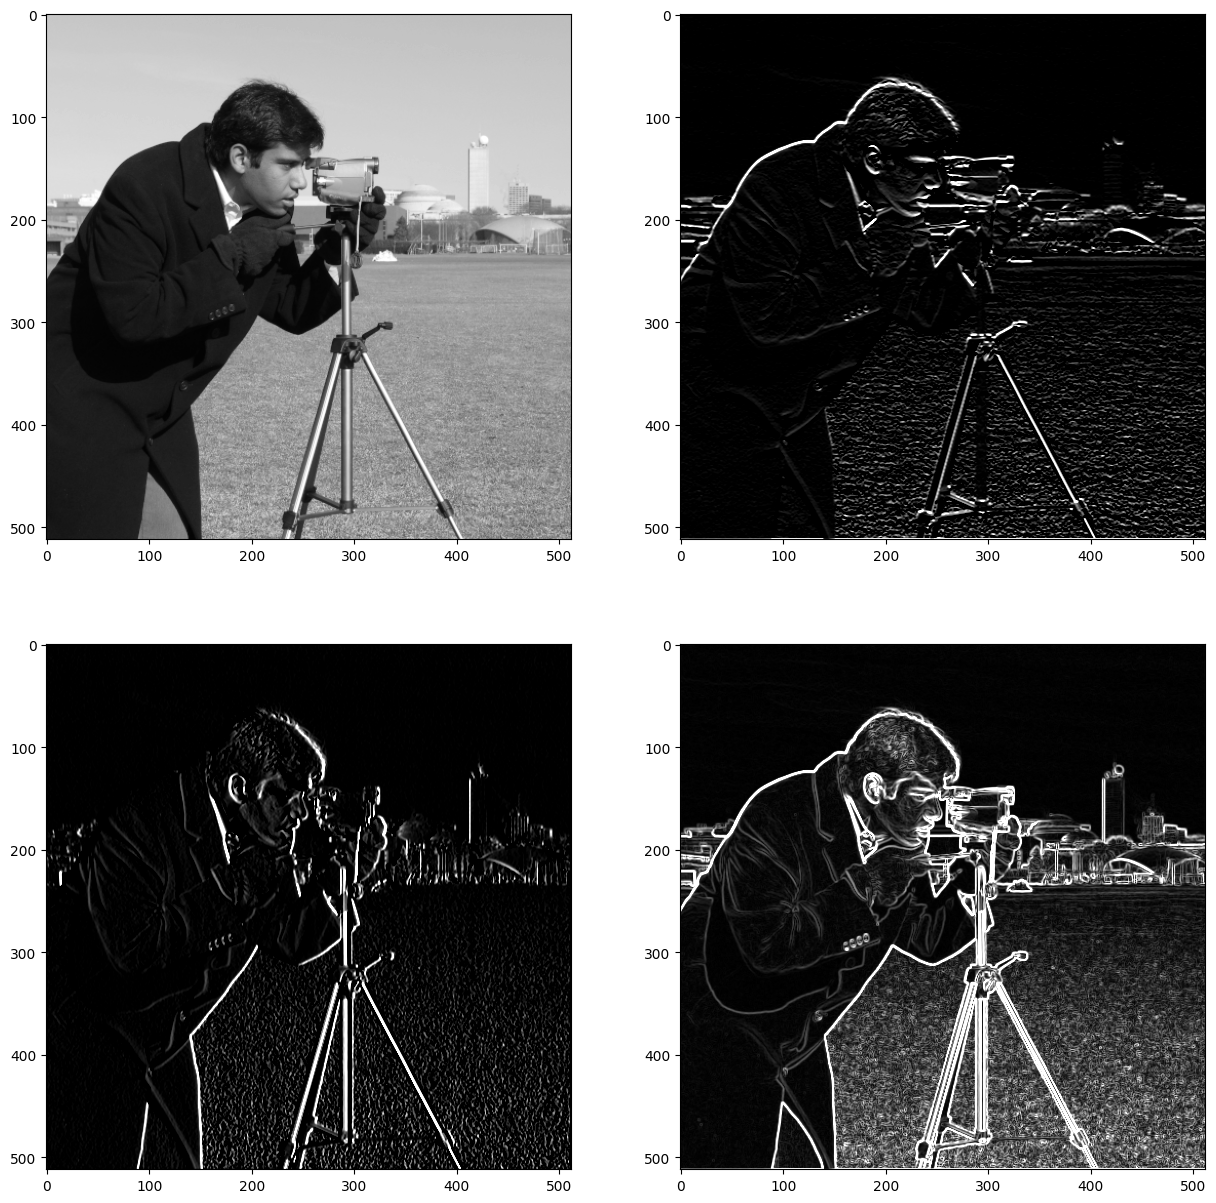

In [ ]:
import matplotlib.pyplot as plt
from skimage import data


camera = data.camera()


kernel1 = np.array([[1, 2, 1],
                   [0,  0, 0 ],
                   [-1, -2, -1]])


kernel2 = np.array([[-1, 0, 1],
                   [-2, 0,  2],
                   [-1, 0, 1]])

kernel3 = np.array([[0, 2, 2],
                   [-2, 0,  2],
                   [-2, -2, 0]])

ker = np.sqrt(kernel1**2+kernel2**2)

out1 = conv(camera, kernel1, pad=1)
out2 = conv(camera, kernel2, pad=1)
out3 = np.sqrt(out1**2+out2**2)

# out3 = conv(camera, ker, pad=1)
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].imshow(camera, cmap='gray', vmin=0, vmax=255)
axs[0, 1].imshow(out1, cmap='gray', vmin=0, vmax=255)
axs[1, 0].imshow(out2, cmap='gray', vmin=0, vmax=255)
axs[1, 1].imshow(out3, cmap='gray', vmin=0, vmax=255)


## Формат результата

Результатом является 4 изображения, пример:
<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/Exercises/EX06/sobel_results.png"  width="1000">


# Задание 2. Создание сверточной сети для MNIST

Создайте сверточную сеть на Pytorch и обучите ее на MNIST.  
* Используйте не более трёх [сверточных](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) и не более двух [полносвязанных](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) слоев, а также один слой [пулинга](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) (слой пулинга и аргумент stride у сверточных слоев помогут избежать большой размерности на входе в линейный слой).
* Функцию активации выберите на свое усмотрение.  
* Не применяйте слои других типов.  
*  Рекомендуется использовать код для обучения **из лекции №5** и класс ProgressPlotter для вывода графиков

Функция для подсчета точности.
Изменять код в данном блоке не требуется.

In [ ]:
import torch

def get_correct_count(pred, labels):
  _, predicted = torch.max(pred.data, 1)
  return (predicted.to(device) == labels.to(device)).sum().item()

@torch.inference_mode() # this annotation disable grad computation
def validate(model, data_loader, criterion, device = "cuda"):
    correct, total  = 0, 0
    loss = 0
    for imgs, labels in data_loader:
        pred = model(imgs.to(device))
        loss += criterion(pred, labels.to(device))
        total += labels.size(0)
        correct += get_correct_count(pred, labels)
    return correct / total,  loss.item() / len(data_loader)

@torch.inference_mode()
def calculate_accuracy(model, data_loader, criterion, device='cuda'):
    correct, total = 0, 0
    loss = 0
    for batch in data_loader:
        imgs, labels = batch
        pred = model(imgs.to(device))
        loss += criterion(pred, labels.to(device))
        correct += get_correct_count(pred,labels.to(device))
        total += labels.size(0)

    return correct / total , loss.item() / len(data_loader)

def accuracy_on_test(model, data_loader, criterion):
    model.eval()
    test_accuracy,_ = calculate_accuracy(model, data_loader, criterion)
    print(f"Accuracy on TEST {test_accuracy:.2f}")
    return test_accuracy

In [ ]:
import torch
import torch.nn as nn
from tqdm import trange
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Cuda available: {torch.cuda.is_available()} \n")
device

Cuda available: True 



device(type='cuda')

In [ ]:
from torch.utils.data import random_split
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.13), (0.3))])

dataset = MNIST(root='./data', train=True, download=True, transform=transform)
testset = MNIST(root='./data', train=False, download=True, transform=transform)


trainset, valset, _  = random_split(dataset, [12000, 3000, 45000])


batch_size = 256

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

100%|██████████| 9912422/9912422 [00:00<00:00, 29558371.18it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 97847894.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 91277206.69it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18899334.10it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
def train(model, criterion, optimizer, num_epochs=25, tag="cifar10", device='cuda'):
    model = model.to(device)
    pp = ProgressPlotter()
    for epoch in range(num_epochs):
        correct, total, ep_loss = 0, 0, 0
        for imgs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(imgs.to(device))
            loss = criterion(outputs, labels.to(device))
            outputs = outputs.cpu()
            # ouputs_prob = nn.Softmax(dim=1)(outputs)
            labels = labels.cpu()
            correct += get_correct_count(outputs, labels)
            loss.backward()
            optimizer.step()
            total += labels.size(0)
            ep_loss += loss.item()
        # Logging
        pp.add_scalar('loss_train', ep_loss / len(train_loader))
        pp.add_scalar('accuracy_train', correct/total)

        correct, loss_val = validate(model,val_loader,criterion, device=device)
        pp.add_scalar('loss_val',loss_val)
        pp.add_scalar('accuracy_val', correct)

        pp.display([['loss_train','loss_val'],['accuracy_train','accuracy_val']])

    return pp

In [ ]:
import torch.nn as nn
import torch

class TwoLayerCNN(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv = nn.Sequential(
        #28*28-->28
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        #28-->14
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (28 - 2)/2 + 1 = 14
        #14*14-->14
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        )
      self.fc = nn.Sequential(
        nn.Linear(32*14*14, 256),
        nn.ReLU(),
        nn.Linear(256, 10),
        )

    def forward(self, x):
        feature = self.conv(x)
        logits = self.fc(feature.view(x.shape[0],-1))
        return nn.Softmax(dim=1)(logits)


Загрузите MNIST:

https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

Разместите код для обучения в этом блоке.

* Используйте GPU. Для этого Вам необходимо в верхней панели выбрать `Среда выполнения > Сменить среду выполнения` и заменить None на GPU.
* Для оценки точности используйте функцию `validate`

* Подумайте над тем, чтобы поместить код для обучения в функцию или класс, который вы сможете использовать в следующих заданиях.


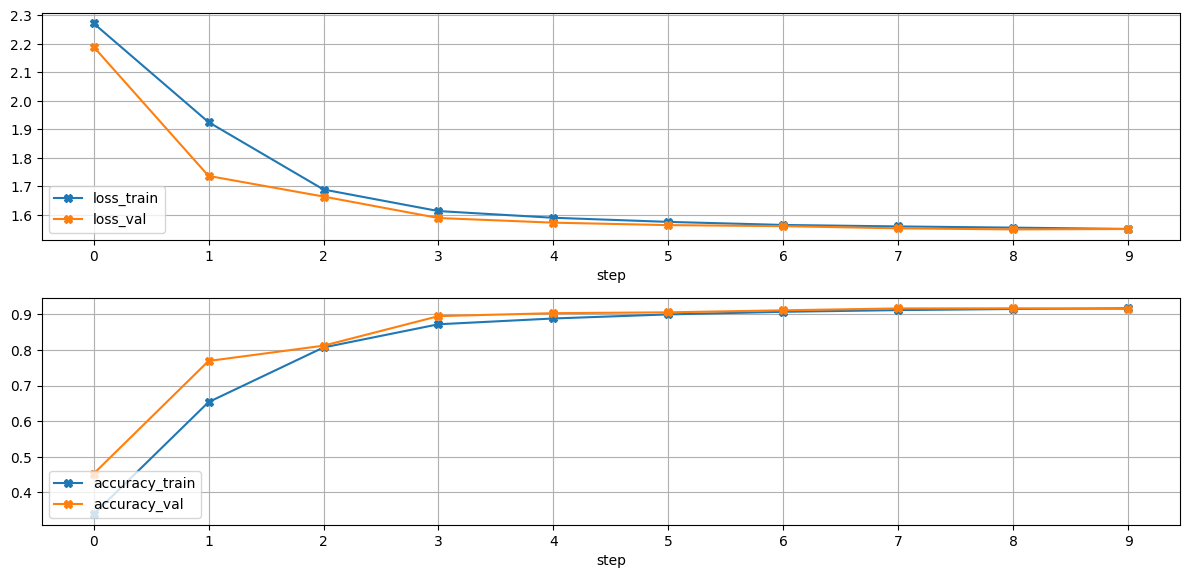

Accuracy on TEST 0.92


In [ ]:
history_for_plotting = []
acc_on_test = []
model = TwoLayerCNN().to(device)  # Create model instance
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)  # Weight update
criterion = nn.CrossEntropyLoss().to(device) # Loss function
pp = train(model, criterion, optimizer, num_epochs=10)
# history_for_plotting.append(pp.history_dict)
acc_on_test.append(accuracy_on_test(model, test_loader, criterion))

In [ ]:
history_for_plotting.append(pp.history_dict)

In [ ]:
test_val, _ = validate(model, test_loader, criterion)
print(test_val)

0.9173


## Формат результата

Результатом является сверточная сеть обученная на MNIST, с точностью не ниже 0.9

# Задание 3. Построение графика

Постройте график зависимости точности вашей модели от количества свёрточных слоёв в ней: постройте модели, в которых будет 2, 3, 5, 7 слоев.   

Рекомендуется периодически уменьшать пространственные размеры карты признаков и одновременно удваивать количество каналов на выходе сверточного слоя. Для уменьшения пространственных размеров карт признаков рекомендуется использовать слой [пулинга](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html).  Для экономии времени в первом сверточном слое ограничьтесь 8-ю каналами на выходе.


График строится на основе точности модели после шести эпох обучения.

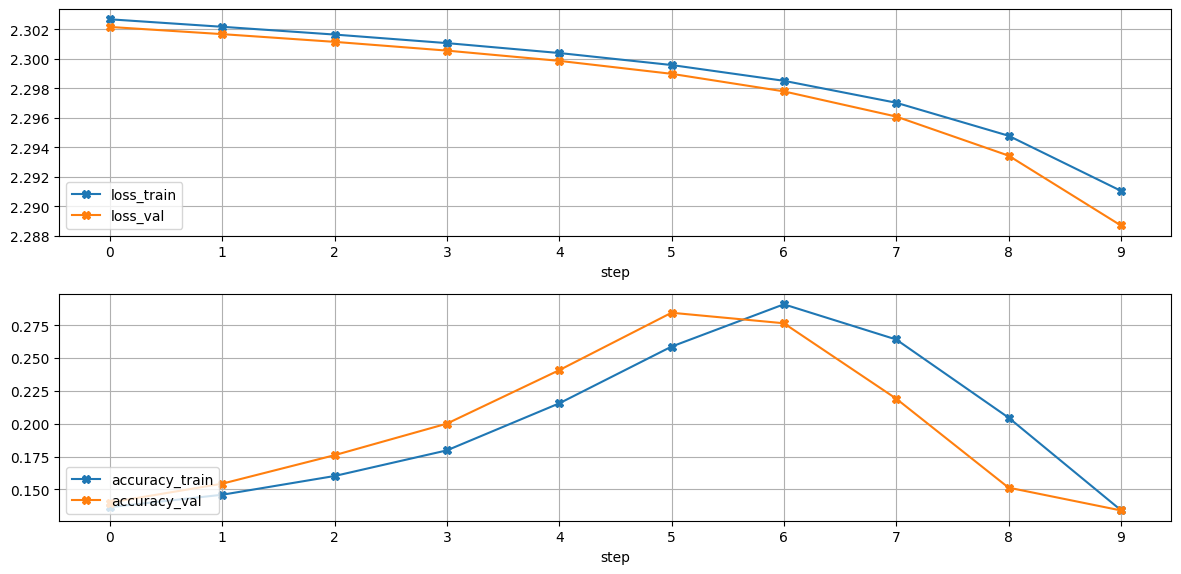

Accuracy on TEST 0.14


In [ ]:
import matplotlib.pyplot as plt

class ThreeLayerCNN(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
      self.fc = nn.Sequential(
        nn.Linear(32*3*3, 128),
        nn.ReLU(),
        nn.Linear(128, 10),
        )

    def forward(self, x):
        feature = self.conv(x)
        logits = self.fc(feature.view(x.shape[0],-1))
        return nn.Softmax(dim=1)(logits)

model2 = ThreeLayerCNN().to(device)  # Create model instance
model2.train()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.05)  # Weight update
criterion = nn.CrossEntropyLoss().to(device) # Loss function
pp2 = train(model2, criterion, optimizer, num_epochs=10)
history_for_plotting.append(pp2.history_dict)
acc_on_test.append(accuracy_on_test(model2, test_loader, criterion))

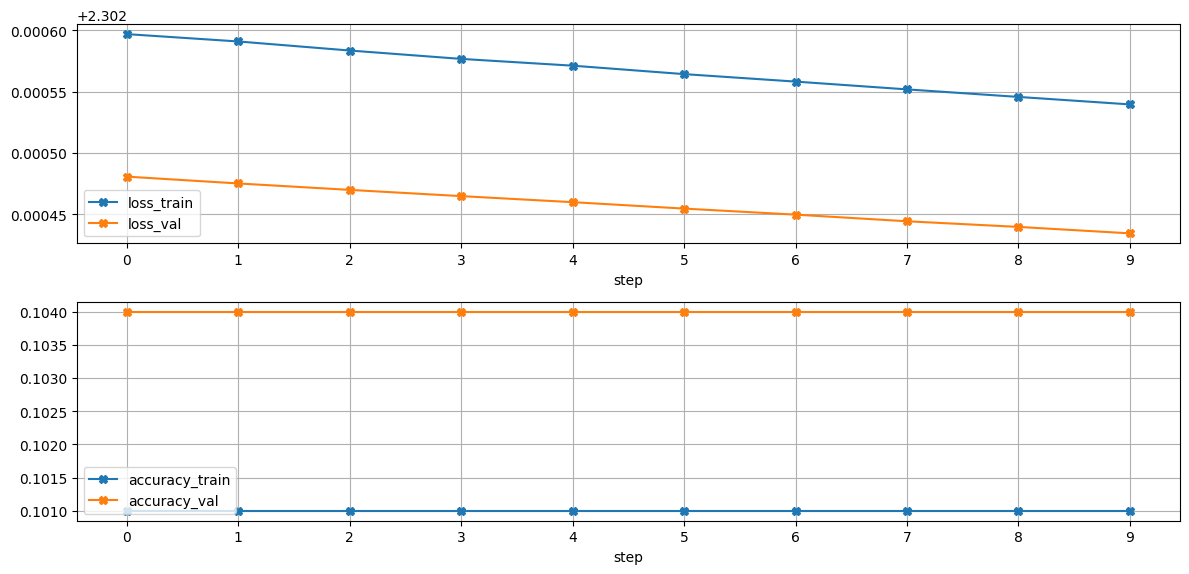

Accuracy on TEST 0.10


In [ ]:
class FiveLayerCNN(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        # nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
      self.fc = nn.Sequential(
        nn.Linear(128*1*1, 256),
        nn.ReLU(),
        nn.Linear(256, 10),
        )

    def forward(self, x):
        feature = self.conv(x)
        logits = self.fc(feature.view(x.shape[0],-1))
        return nn.Softmax(dim=1)(logits)

model3 = FiveLayerCNN().to(device)  # Create model instance
model3.train()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.05)  # Weight update
criterion = nn.CrossEntropyLoss().to(device) # Loss function
pp3 = train(model3, criterion, optimizer, num_epochs=10)
history_for_plotting.append(pp3.history_dict)
acc_on_test.append(accuracy_on_test(model3, test_loader, criterion))

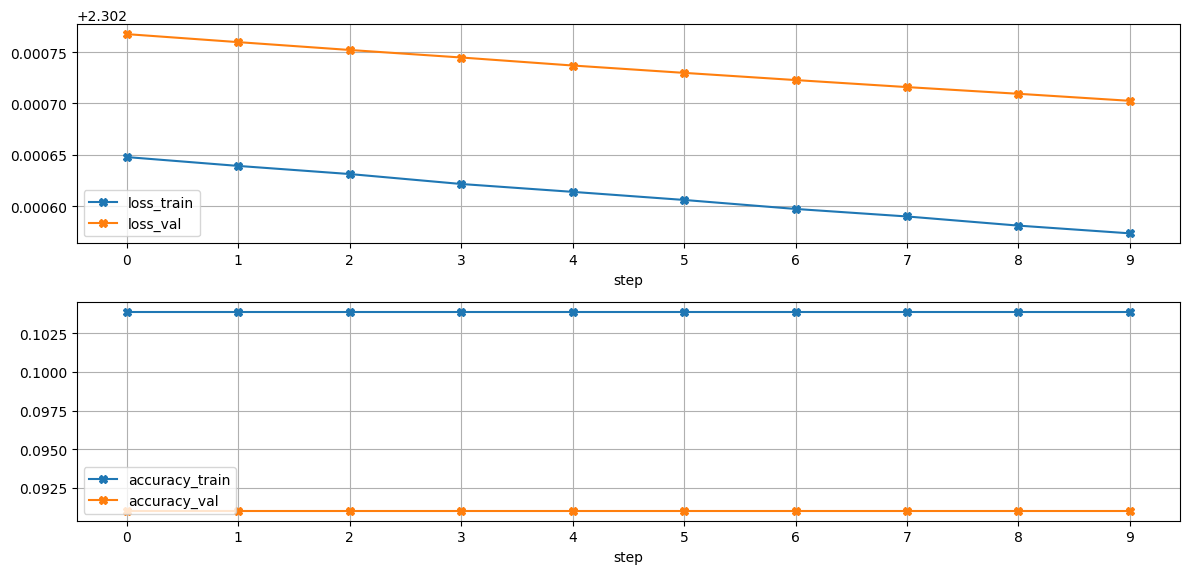

Accuracy on TEST 0.10


In [ ]:
class SevenLayerCNN(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        # nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
      self.fc = nn.Sequential(
        nn.Linear(512*1*1, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
        )

    def forward(self, x):
        feature = self.conv(x)
        logits = self.fc(feature.view(x.shape[0],-1))
        return nn.Softmax(dim=1)(logits)

model4 = FiveLayerCNN().to(device)  # Create model instance
model4.train()
optimizer = torch.optim.SGD(model4.parameters(), lr=0.05)  # Weight update
criterion = nn.CrossEntropyLoss().to(device) # Loss function
pp4 = train(model4, criterion, optimizer, num_epochs=10)
history_for_plotting.append(pp4.history_dict)
acc_on_test.append(accuracy_on_test(model4, test_loader, criterion))

In [ ]:
accuracy_all = []
accuracy_all.append(max(pp.history_dict['accuracy_val']))
accuracy_all.append(max(pp2.history_dict['accuracy_val']))
accuracy_all.append(max(pp3.history_dict['accuracy_val']))
accuracy_all.append(max(pp4.history_dict['accuracy_val']))

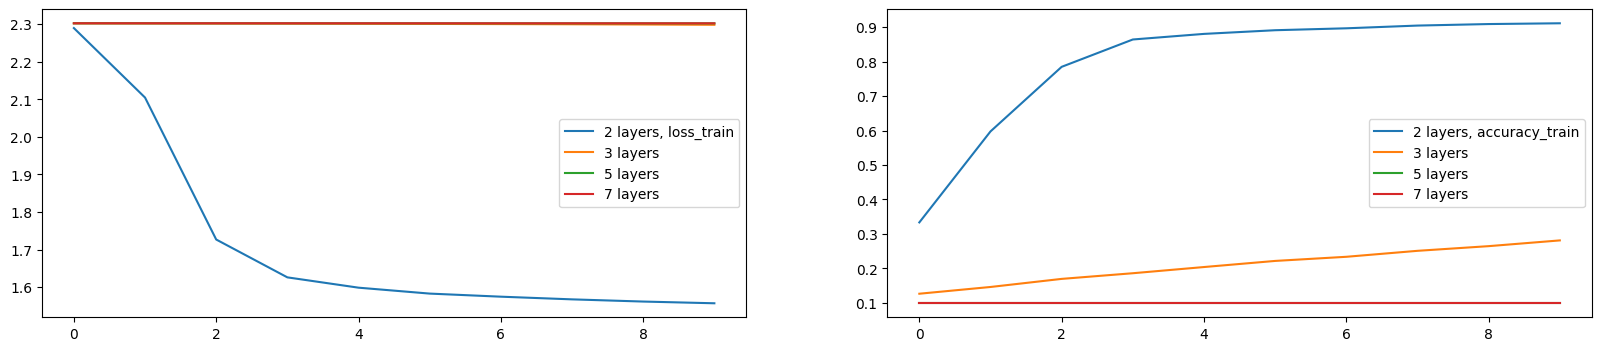

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 4), sharex=False, sharey=False, gridspec_kw={'wspace':0.2,'hspace':0.2})
len_ = len(history_for_plotting[0]['loss_train'])

ax[0].plot(list(range(len_)), history_for_plotting[0]['loss_train'], label='2 layers, loss_train')
# ax[0].plot(list(range(len_)), history[0]['loss_val'], label='before, loss_val')

ax[0].plot(list(range(len_)), history_for_plotting[1]['loss_train'], label='3 layers')
ax[0].plot(list(range(len_)), history_for_plotting[2]['loss_train'], label='5 layers')
ax[0].plot(list(range(len_)), history_for_plotting[3]['loss_train'], label='7 layers')
# ax[0].plot(list(range(len_)), history[1]['loss_val'], label='after, loss_val')
ax[0].legend()

ax[1].plot(list(range(len_)), history_for_plotting[0]['accuracy_train'], label='2 layers, accuracy_train')
# ax[1].plot(list(range(len_)), history[0]['accuracy_val'], label='before, accuracy_val')

ax[1].plot(list(range(len_)), history_for_plotting[1]['accuracy_train'], label='3 layers')
ax[1].plot(list(range(len_)), history_for_plotting[2]['accuracy_train'], label='5 layers')
ax[1].plot(list(range(len_)), history_for_plotting[3]['accuracy_train'], label='7 layers')
# ax[1].plot(list(range(len_)), history[1]['accuracy_val'], label='after, accuracy_val')
ax[0].legend()


ax[1].legend()

Text(0, 0.5, 'accuracy val')

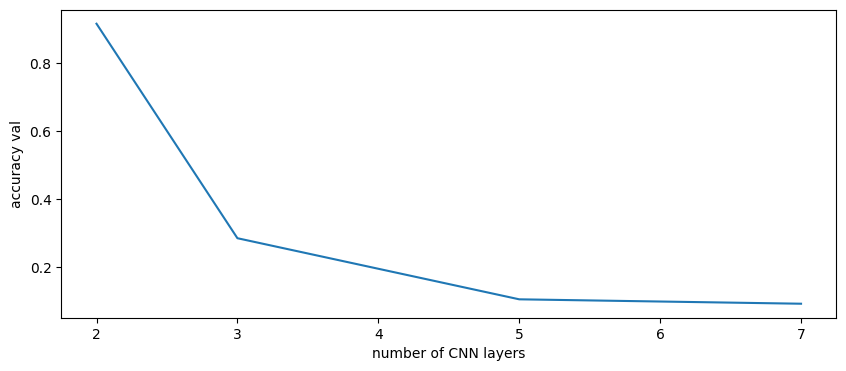

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4), sharex=False, sharey=False, gridspec_kw={'wspace':0.2,'hspace':0.2})
n_layers = [2, 3, 5, 7]
ax.plot(n_layers, accuracy_all)
ax.set_xlabel('number of CNN layers')
ax.set_ylabel('accuracy val')

###Вывод:  
Как изменяется точность модели при увеличении количества слоев?

Использование большого количества сверточных слоев не всегда делает качество модели лучше. Нужно подбирать число таких слоев в зависимости от конкретной задачи

## Формат результата

Результатом является график, пример:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/Exercises/EX06/accuracy_epochs.png"  width="600">


# Задание 4. Сверточная сеть для классификации заболеваний растений

Используя созданные датасеты, обучите свёрточную нейронную сеть для определения заболевания растения. Используя фиксированную (по свёрточным слоям) архитектуру модели, посмотрите на качество обучения при различных размерах входных изображений и опишите причину наблюдаемой закономерности.

Создание датасета из набора файлов

Фотографии листьев растений находятся в трех архивах. Загрузим их:

In [ ]:
!wget https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/ibeans/train.zip
!wget https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/ibeans/validation.zip
!wget https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/ibeans/test.zip

--2024-04-04 14:46:49--  https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/ibeans/train.zip
Resolving edunet.kea.su (edunet.kea.su)... 185.30.98.120
Connecting to edunet.kea.su (edunet.kea.su)|185.30.98.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137.15M  7.00MB/s    in 22s     

2024-04-04 14:47:14 (6.18 MB/s) - ‘train.zip’ saved [143812152/143812152]

--2024-04-04 14:47:14--  https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/ibeans/validation.zip
Resolving edunet.kea.su (edunet.kea.su)... 185.30.98.120
Connecting to edunet.kea.su (edunet.kea.su)|185.30.98.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[===================>]  17.65M  4.04MB/s    in 4.4s    

2024-04-04 14:47:19 (4.04 MB/s) - ‘validation.zip’ save

и разархивируем

In [ ]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

Archive:  train.zip
   creating: train/
   creating: train/healthy/
   creating: train/angular_leaf_spot/
   creating: train/bean_rust/
  inflating: train/healthy/healthy_train.265.jpg  
  inflating: train/healthy/healthy_train.271.jpg  
  inflating: train/healthy/healthy_train.259.jpg  
  inflating: train/healthy/healthy_train.99.jpg  
  inflating: train/healthy/healthy_train.311.jpg  
  inflating: train/healthy/healthy_train.66.jpg  
  inflating: train/healthy/healthy_train.72.jpg  
  inflating: train/healthy/healthy_train.305.jpg  
  inflating: train/healthy/healthy_train.339.jpg  
  inflating: train/healthy/healthy_train.113.jpg  
  inflating: train/healthy/healthy_train.107.jpg  
  inflating: train/healthy/healthy_train.106.jpg  
  inflating: train/healthy/healthy_train.112.jpg  
  inflating: train/healthy/healthy_train.338.jpg  
  inflating: train/healthy/healthy_train.73.jpg  
  inflating: train/healthy/healthy_train.304.jpg  
  inflating: train/healthy/healthy_train.310.jpg  
 

Каждый архив содержит папку с тремя подпапками:


*   angular_leaf_spot
*   bean_rust
*   healthy

подпапки соответствует классу (название заболевания или здоровое растение)

Для работы с данными в таком формате удобно использовать класс [torchvision.datasets.ImageFolder](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html)


In [ ]:
from torchvision.datasets import ImageFolder


val_dataset = ImageFolder('validation')
train_dataset = ImageFolder('train')

print("Classes names", val_dataset.classes)

Classes names ['angular_leaf_spot', 'bean_rust', 'healthy']


Выведем одно изображение

Size : (500, 500) Class: angular_leaf_spot


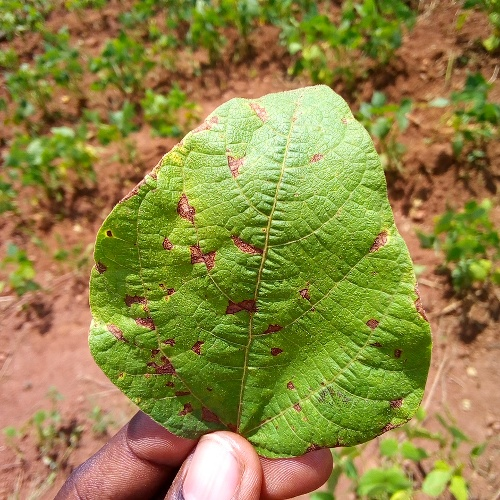

In [ ]:
img, cls_num = val_dataset[0]
print(f"Size : {img.size} Class: {val_dataset.classes[cls_num]}") # pillow
display(img)

Создадим загрузчики


In [ ]:
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=batch_size,shuffle = False)

test_dataset = ImageFolder('test')
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

Создайте сверточную сеть для классификации

При этом:
* Не используйте больше пяти сверточных слоев
* Используйте принцип: при увеличении количества фильтров в два раза, пространственные размеры карты признаков так же уменьшаются в два раза.
* Помните о том, что большой модели может не хватить памяти при изображениях размером 500х500 и batch_size =32

In [ ]:
import torch.nn as nn
import torch


class BeanCNN(nn.Module):

    def __init__(self, side_size):
        super().__init__()
        self.side_size = side_size
        self.layers_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),

            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),

            # nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            # nn.MaxPool2d(kernel_size=2),
            # nn.ReLU(),

            nn.Flatten(),
            nn.Linear(32*(side_size//2//2//2)*(side_size//2//2//2), 32),
            nn.Linear(32, 3),
        )

    def forward(self, x):
      return self.layers_stack(x)







P.s. Нам нужно менять размер изображения в ходе экспериментов, поэтому мы не стали передавать набор трансформаций в конструктор класса датасета. Будем устанавливать это свойство в начале каждого эксперимента.

In [ ]:
import torchvision.transforms as T

def get_transforms(side_size):
  # create set of transforms applied to the images
  return T.Compose(
      [
        T.Resize((side_size, side_size)),
        T.ToTensor(),
        T.Normalize(
          mean=[0.5183, 0.4845, 0.6570],
          std=[0.2111, 0.2227, 0.2291]
        )
      ]
    )

Обучите несколько вариантов модели, обрабатывающих входы различного размера. Допустимо использовать вспомогательные функции (validate, train) из первого задания. Для изменения размера изображений рекомендуется использовать механизм трансформаций Pytorch.

**При обучении внутри цикла сохраняйте лучшую модель и размер изображения, при котором удалось достичь максимальной точности на валидационной выборке**

Для сохранения модели в отдельный объект используйте функцию `deepcopy`

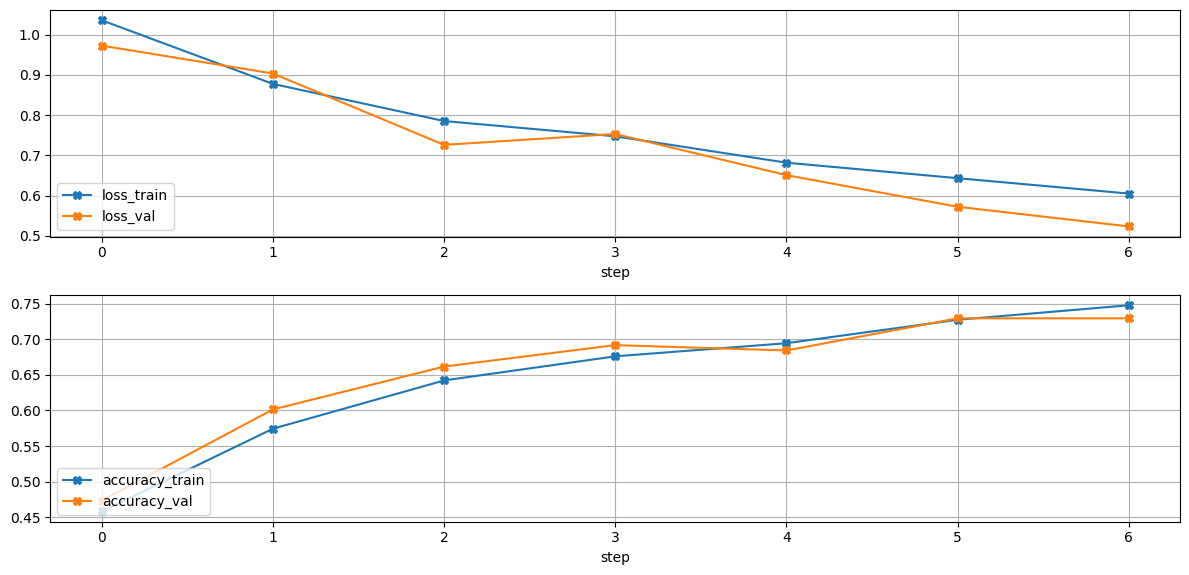

Accuracy on TEST 0.80
CPU times: user 4min 19s, sys: 22.6 s, total: 4min 42s
Wall time: 4min 41s


In [36]:
%%time
from copy import deepcopy
acc_test = []
acc_val = []
acc_all_val = []
side_sizes = [500, 256, 128, 64, 32]

for side_size in (side_sizes):
    # Change transform on both datasets
    transform  = get_transforms(side_size)
    train_dataset.transform = transform
    val_dataset.transform = transform
    test_dataset.transform = transform
    model = BeanCNN(side_size=side_size).to(device)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Weight update
    criterion = nn.CrossEntropyLoss().to(device) # Loss function
    pp = train(model, criterion, optimizer, num_epochs=7)
    acc_test.append(accuracy_on_test(model, test_loader, criterion))
    acc_val.append(np.max(pp.history_dict['accuracy_val']))
    acc_all_val.append(pp.history_dict['accuracy_val'])



Сравните графики значений accuracy для разных размеров входных изображений:

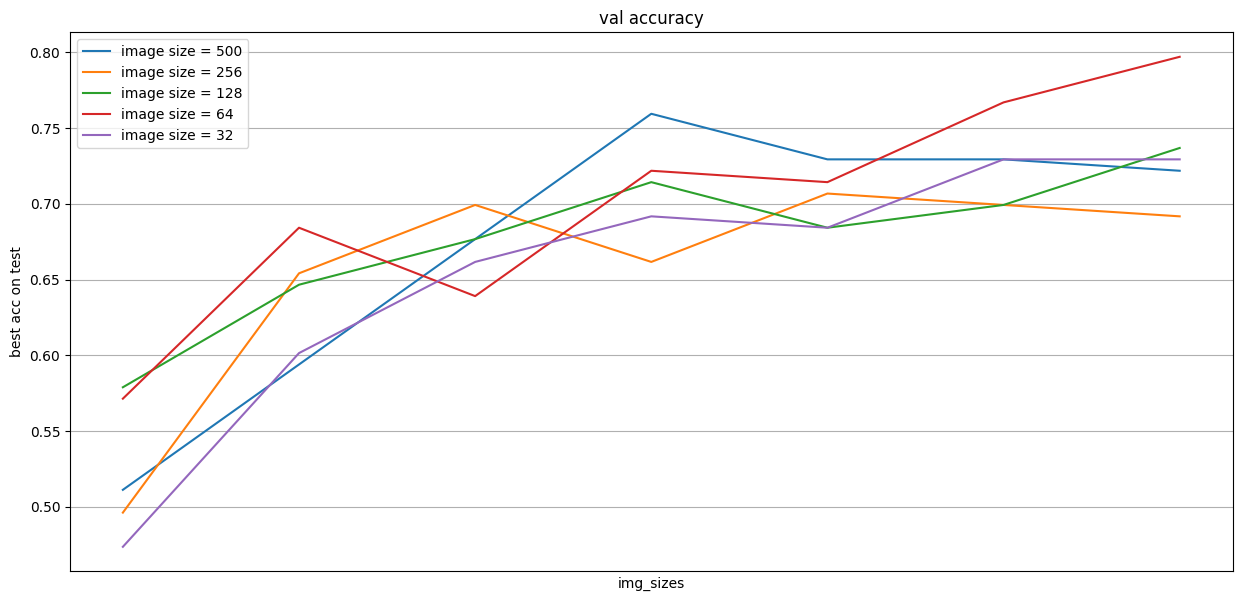

In [42]:
epoches=np.array([1, 2, 3, 4, 5, 6, 7])
fig, ax = plt.subplots(figsize=(15, 7) )
ax.set_xlabel('img_sizes')
ax.set_xticks(side_sizes)
ax.set_ylabel('best acc on test')
ax.grid()
ax.set_title('val accuracy')
for i in range(len(side_sizes)):
  ax.plot(epoches, acc_all_val[i], label=f'image size = {side_sizes[i]}')
plt.legend()


Validation accuracy 0.7593984962406015 for side size 500
Validation accuracy 0.706766917293233 for side size 256
Validation accuracy 0.7368421052631579 for side size 128
Validation accuracy 0.7969924812030075 for side size 64
Validation accuracy 0.7293233082706767 for side size 32


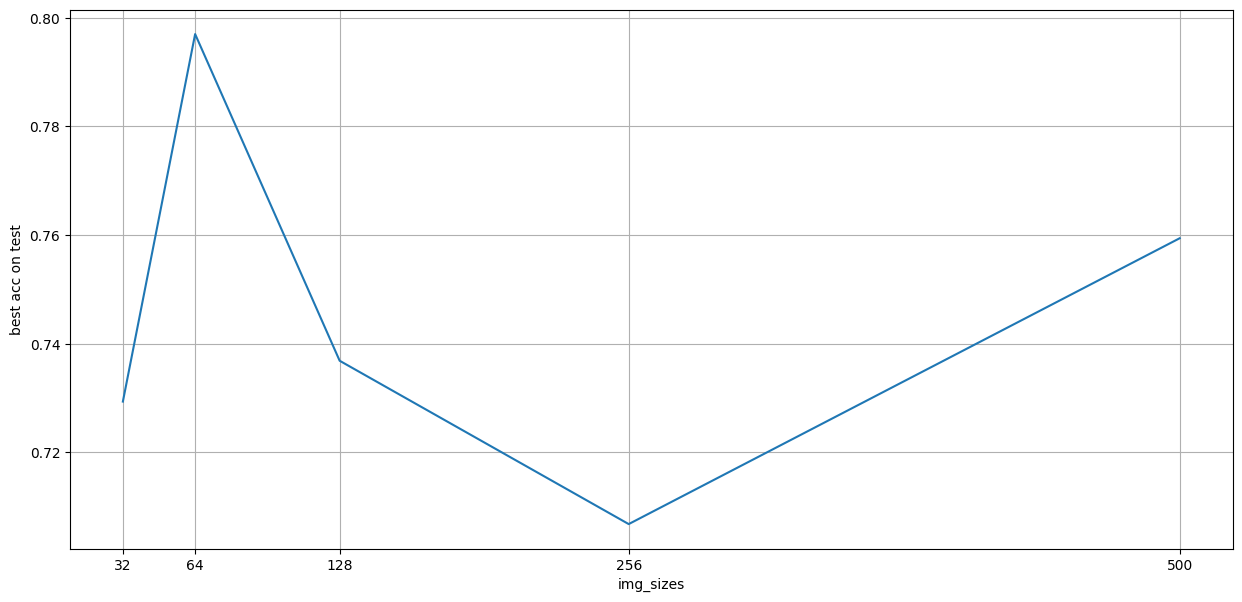

In [43]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(side_sizes, acc_val)
ax.set_xlabel('img_sizes')
ax.set_xticks(side_sizes)
ax.set_ylabel('best acc on test')
ax.grid()
for acc, side_size in zip(acc_val, side_sizes):
  print(f'Validation accuracy {acc} for side size {side_size}')

Accuracy on test 0.703125 for side size 500
Accuracy on test 0.734375 for side size 256
Accuracy on test 0.78125 for side size 128
Accuracy on test 0.796875 for side size 64
Accuracy on test 0.8046875 for side size 32


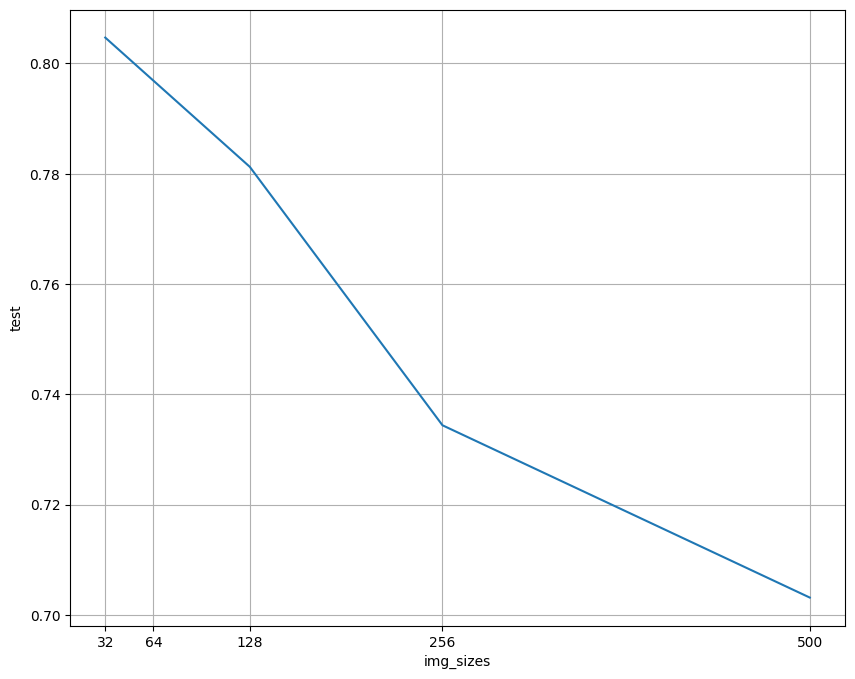

In [44]:
fig, ax = plt.subplots(figsize=(10, 8) )
ax.plot(side_sizes, acc_test)
ax.set_xlabel('img_sizes')
ax.set_xticks(side_sizes)
ax.set_ylabel('test')
ax.grid()
for acc, side_size in zip(acc_test, side_sizes):
  print(f'Accuracy on test {acc} for side size {side_size}')

Проверьте результат на тестовом датасете

**Вывод:**



## Формат результата

Результатом является показание точности сети при различных размерах входных изображений.

Например:

* Размер изображения 32х32 точность 0.6

* Размер изображения 64х64 точность 0.7

* Размер изображения 500х500 точность 0.57


# Задание 5. Создание сверточной сети для CIFAR10

Создайте сверточную сеть на Pytorch и обучите ее на СIFAR10. Цель получить лучшее качество чем у полносвязанной сети которую мы обучали в 5й лекции.  

* Используйте не более трёх [сверточных](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) и не более двух [полносвязанных](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) слоев, а также один слой [пулинга](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) между ними (слой пулинга и аргумент stride у сверточных слоев помогут избежать большой размерности на входе в линейный слой).
* Функцию активации выберите на свое усмотрение.  
* Не применяйте слои других типов.  
* Используйте код для обучения из лекции №5.

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F


class CIFAR10_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.ReLU(),

            nn.Flatten(),
            nn.Linear(32*4*4, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )


    def forward(self, x):
        return self.conv_stack(x)

Загрузите CIFAR10:

In [ ]:
from torch.utils.data import random_split
import torchvision
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

dataset = CIFAR10(root='./CIFAR10', train=True, download=True, transform=transform)
testset = CIFAR10(root='./CIFAR10', train=False, download=True, transform=transform)


trainset, valset = random_split(dataset, [40000, 10000])

100%|██████████| 170498071/170498071 [00:10<00:00, 15855690.95it/s]


Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified


Разместите код для обучения в этом блоке.

Используйте GPU. Для этого Вам необходимо в верхней панели выбрать `Среда выполнения > Сменить среду выполнения` и заменить None на GPU.

In [ ]:
from torchvision import transforms

batch_size = 512

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


Mean = torch.mean(torch.tensor(dataset.data)/255).item()
Std = torch.std(torch.tensor(dataset.data)/255).item()

transform_with_normalize = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(Mean, Std)])

dataset.transform = transform_with_normalize
testset.transform = transform_with_normalize


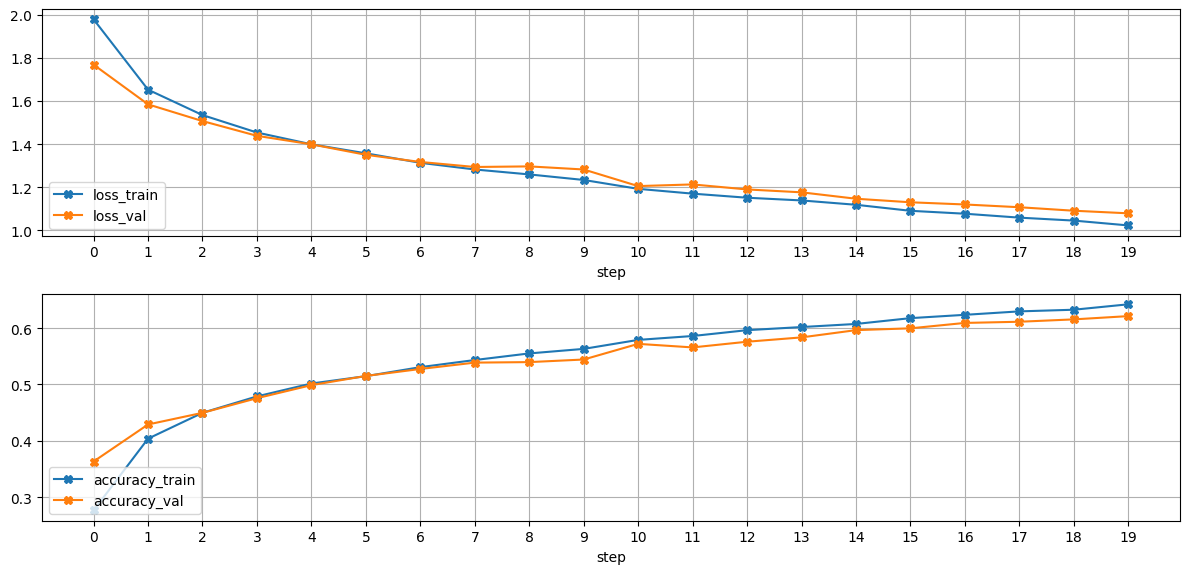

Max accuracy = 0.6214
Accuracy on TEST 0.62


In [ ]:
model5 = CIFAR10_CNN()
model5.to(device)
optimizer = torch.optim.Adam(model5.parameters(), lr=0.001)  # Weight update
criterion = nn.CrossEntropyLoss() # Loss function
pp = train(model5, criterion, optimizer, num_epochs=20)
acc_val5 = pp.history_dict['accuracy_val']

max_acc = np.max(acc_val5)
print('Max accuracy =', max_acc)

test_accuracy, _ = validate(model5, test_loader,criterion, device=device)
print(f"Accuracy on TEST {test_accuracy:.2f}")

## Формат результата

Результатом является сверточная сеть обученная на CIFAR10, с точностью не ниже 0.6